In [1]:
import numpy as np
import pickle
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
with open("../saved_models and files/word_to_idx.pkl","rb") as w2i:
    word_to_idx=pickle.load(w2i)
with open("../saved_models and files/idx_to_word.pkl","rb") as i2w:
    idx_to_word=pickle.load(i2w)
with open("../saved_models and files/test_featured_image.pkl","rb") as tfi:
    test_featured_image=pickle.load(tfi)
with open("../saved_models and files/test_description.pkl","rb") as td:
    test_description=pickle.load(td)
with open("../saved_models and files/train_featured_image.pkl","rb") as tfi:
    train_featured_image=pickle.load(tfi)

In [10]:
model = load_model('../save_model_weight3/model_21.h5')

C:\Users\yash\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [11]:
max_len=35
def predict_caption(photo):
    in_text="startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        y_pred = model.predict([photo,sequence])
        y_pred = y_pred.argmax()
        word = idx_to_word[y_pred]
        in_text+=(' '+word)

        if word == 'endseq':
            break
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

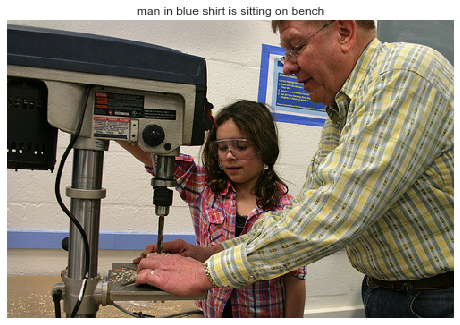

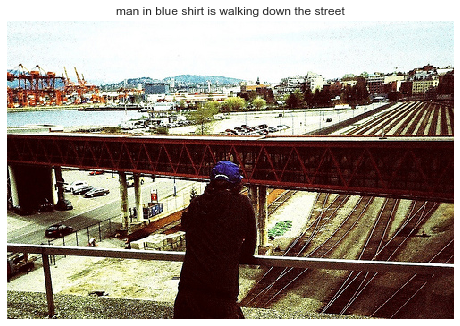

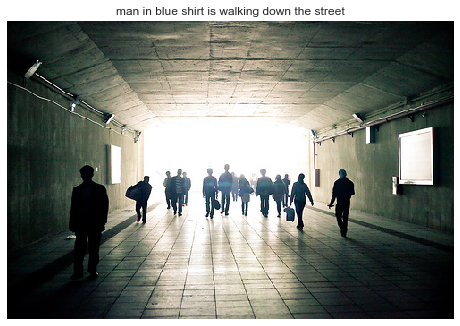

In [ ]:
plt.style.use('seaborn')
for i in range(20):
    idx = np.random.randint(0,2800)
    all_img_names = list(train_featured_image.keys())
    img_name = all_img_names[idx]
    photo_2048 = train_featured_image[img_name].reshape((1,2048))

    i=plt.imread("../flickr30k_images/flickr30k_images/"+img_name)

    caption = predict_caption(photo_2048)

    plt.title(caption)
    plt.imshow(i)
    plt.axis('off')
    plt.show()